In [1]:
%pip install gpxpy
%pip install contextily
%pip install folium
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gpxpy as gpx
import geopandas as gpd
import contextily as ctx
import folium
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from gpx_analyser import gpxAnalyserClass

In [2]:
gpxAnalyseDay1 = gpxAnalyserClass("29-01-2025.gpx")

df = gpxAnalyseDay1.df
print(df.head())

         lat       lon    ele                      time    hr    cad  \
0  40.542303 -3.645087  687.2 2025-01-29 08:36:45+00:00  91.0  156.0   
1  40.542334 -3.645152  687.4 2025-01-29 08:36:47+00:00  90.0  180.0   
2  40.542356 -3.645254  687.6 2025-01-29 08:36:50+00:00  92.0  182.0   
3  40.542337 -3.645441  688.0 2025-01-29 08:36:55+00:00  94.0  183.0   
4  40.542364 -3.645514  688.1 2025-01-29 08:36:57+00:00  97.0  183.0   

        dist  time_acc      speed  
0   0.000000  0.000000  20.000000  
1   6.484567  0.033333   5.140410  
2  15.443992  0.083333   5.580715  
3  31.386083  0.166667   5.227252  
4  38.246394  0.200000   4.858866  


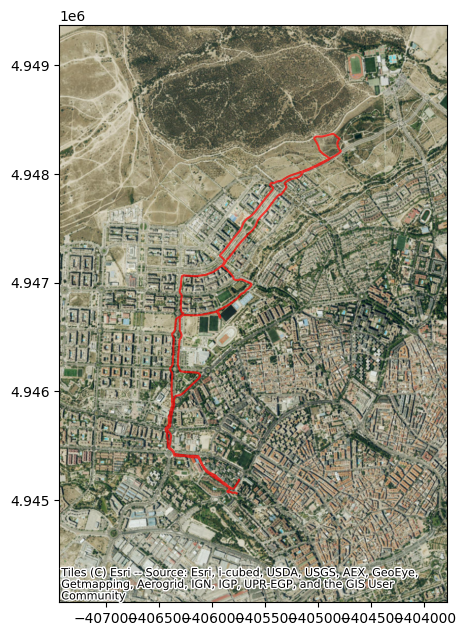

In [3]:
gpxAnalyseDay1.plot_track_satelite()

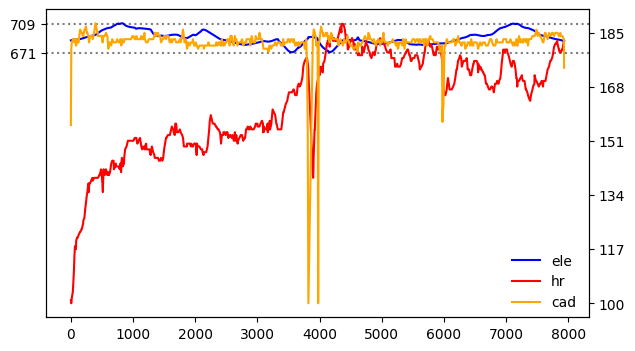

In [3]:
gpxAnalyseDay1.plot_different_param('hr', 'cad')

In [6]:
gpxAnalyseDay2 = gpxAnalyserClass("31-01-2025.gpx")

df = gpxAnalyseDay2.df
print(df.head())

         lat       lon    ele                      time    hr    cad  \
0  40.542336 -3.645046  687.2 2025-01-31 10:21:26+00:00  72.0  100.0   
1  40.542342 -3.645050  687.2 2025-01-31 10:21:27+00:00  72.0  100.0   
2  40.542470 -3.645075  687.5 2025-01-31 10:21:33+00:00  71.0  181.0   
3  40.542516 -3.645136  687.6 2025-01-31 10:21:35+00:00  70.0  178.0   
4  40.542540 -3.645152  687.6 2025-01-31 10:21:36+00:00  73.0  178.0   

        dist  time_acc      speed  
0   0.000000  0.000000  20.000000  
1   0.747903  0.016667  20.000000  
2  15.136771  0.116667   6.949817  
3  22.398421  0.150000   4.590325  
4  25.390032  0.166667   5.571135  


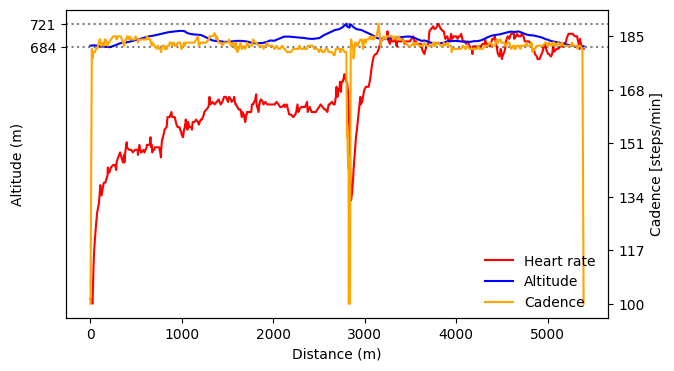

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# Graficar las líneas
line1, = ax.plot(df.dist, df['hr'] / df['hr'].max(), color='red', label="Heart rate")
line2, = ax.plot(df.dist, abs(df['ele'] / df['ele'].max()), color='blue', label="Altitude")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Altitude (m)")

# Ajustar los ticks y líneas de referencia para el eje izquierdo
y_min = int(df['ele'].min())
y_max = int(df['ele'].max())
yticks = [y_min / y_max, 1]
yticks_labels = [str(y_min), str(y_max)]
ax.axhline(y=y_min / y_max, color='k', linestyle=":", alpha=0.5)
ax.axhline(y=1, color='k', linestyle=":", alpha=0.5)
ax.set_yticks(ticks=yticks, labels=yticks_labels)

# Crear segundo eje y agregar la tercera línea
ax2 = ax.twinx()
line3, = ax2.plot(df.dist, df['cad'] / df['cad'].max(), color='orange', label="Cadence")
ax2.set_ylabel("Cadence [steps/min]")

# Ajustar los ticks y etiquetas para el eje derecho
y_min = int(df['cad'].min())
y_max = int(df['cad'].max())
y_steps = int((y_max - y_min) / 5)
yticks = [i / y_max for i in range(y_min, y_max, y_steps)]
yticks_labels = [str(i) for i in range(y_min, y_max, y_steps)]
ax2.set_yticks(ticks=yticks, labels=yticks_labels)

# Crear una única leyenda combinada para ambos ejes
nlines = 3
fig.legend(handles=[line1, line2, line3], bbox_to_anchor=(0.90, nlines * 0.1), ncol=1, frameon=False)

plt.show()